## Binarization Algorithm

#### This is an image binarization algorithm that uses the Otsu's method to find the optimal threshold value for the binarization of the image.
---

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

The best threshold is:  215
The minimum loss is:  16919.395258992583


/tmp/ipykernel_3089/3754151801.py:12: RuntimeWarning: divide by zero encountered in true_divide
  dist_mat = 1/(np.abs(bin[:-1] - thresh)) # Distance matrix


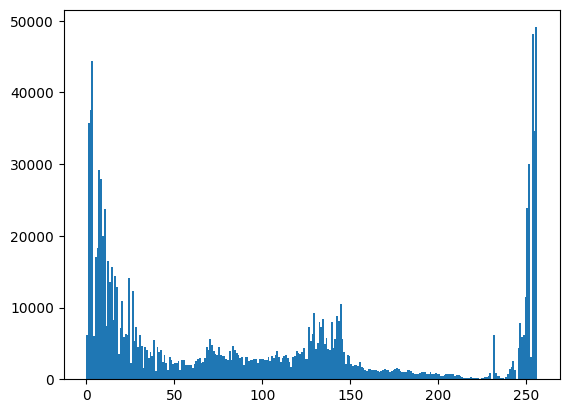

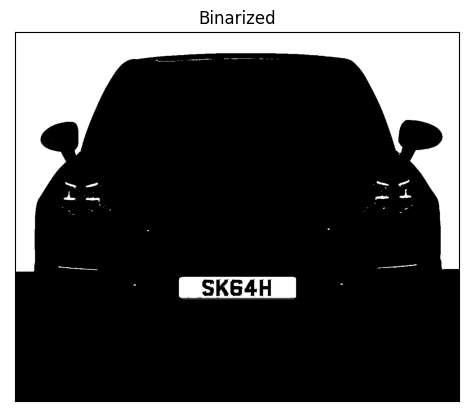

In [101]:
# Load image
img = cv.imread('images/carplate1.webp')

# Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Show the histogram
num, bin, _ = plt.hist(img_gray.ravel(), 256, [0, 256])

# Loss function
def get_loss(num, bin, thresh):
	dist_mat = 1/(np.abs(bin[:-1] - thresh)) # Distance matrix
	dist_mat[thresh] = 0 # Remove the threshold
	#dist_mat_mask = (dist_mat > 1/(30*np.mean(num))) # Mask
	#dist_mat = dist_mat * dist_mat_mask # Apply mask
	loss = np.sum(num * dist_mat) # Loss function
	return loss

def get_best_thresh(num, bin):
	loss_list = []
	for i in range(256):
		loss = get_loss(num, bin, i)
		loss_list.append(loss)
	min_loss = np.min(loss_list)
	best_thresh = np.argmin(loss_list)
	return best_thresh, min_loss

def apply_thresh(img_gray, thresh):
	img_bin = img_gray > thresh # Mask
	plt.figure()
	plt.imshow(img_bin, cmap='gray')
	plt.title('Binarized'), plt.xticks([]), plt.yticks([])
	return img_bin

best_thresh, min_loss = get_best_thresh(num, bin)
img_bin = apply_thresh(img_gray, best_thresh)

print('The best threshold is: ', best_thresh)
print('The minimum loss is: ', min_loss)
     

(Text(0.5, 1.0, 'Binarized with Otsu'), ([], []), ([], []))

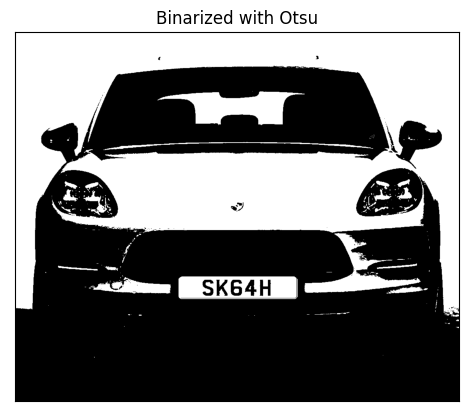

In [96]:
img_otsu = cv.threshold(img_gray, 0, 255, cv.THRESH_OTSU)[1]
plt.figure()
plt.imshow(img_otsu, cmap='gray')
plt.title('Binarized with Otsu'), plt.xticks([]), plt.yticks([])